In [15]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
stations = pd.read_csv('./stations_with_cluster_4_without_pca.csv')

In [17]:
stations_1 = stations[stations['cluster_number'] == 0] # group1
stations_2 = stations[stations['cluster_number'] == 1] # group2
stations_3 = stations[stations['cluster_number'] == 3] # group3
stations_4 = stations[stations['cluster_number'] == 2] # group4



In [8]:
stations_4.sample(n=5)

station_cd  station_g_cd station_name  station_name_k  station_name_r  \
306      1131420       1131420           成東             NaN             NaN   
1869     2700301       2700115         京急川崎             NaN             NaN   
916      2100208       2100208           牛田             NaN             NaN   
1996     9932601       1130107           大船             NaN             NaN   
38       1131913       1131913          東鷲宮             NaN             NaN   

      line_cd  pref_cd      post        address         lon  ...  \
306     11314       12  289-1345          山武市津辺  140.410109  ...   
1869    27003       14  210-0006  川崎市川崎区砂子１-３-１  139.700893  ...   
916     21002       13  120-0023        足立区千住曙町  139.811816  ...   
1996    99326       14  247-0056       鎌倉市大船１丁目  139.531367  ...   
38      11319       11  340-0206   埼玉県久喜市西大輪326  139.679130  ...   

      node_density_km intersection_density_km edge_density_km  \
306        110.849799               87.562026    23254.112786   
1869       199.984963              184.174186    30118.275534   
916        167.619645              153.871662    32512.475090   
1996       199.691204              170.001881    35861.257373   
38         150.887137              143.702035    36084.828738   

      street_density_km  circuity_avg  self_loop_proportion  \
306        11772.436836      1.059014              0.000000   
1869       20757.500752      1.034064              0.000000   
916        17875.049914      1.042824              0.002336   
1996       18232.403987      1.052892              0.000000   
38         19216.318409      1.065351              0.003953   

      clean_intersection_count  clean_intersection_density_km  \
306                      149.0                      69.397563   
1869                     305.0                     130.332080   
916                      197.0                     104.167414   
1996                     264.0                     107.369609   
38                       282.0                     119.188159   

      station_name_roman  cluster_number  
306                  NaN               2  
1869     keikyuukawasaki               2  
916                  NaN               2  
1996              oofuna               2  
38                   NaN               2  

[5 rows x 37 columns]

In [41]:
import folium
from folium import plugins
# 貼り付ける画像
image = "https://i.pinimg.com/originals/93/98/01/93980185d68b64c792049ed75e395db0.png"
center_lat, center_lon = (35.651820534474,139.54461236426)

In [42]:
_map = folium.Map(location=[center_lat, center_lon], zoom_start=10, control_scale=True)

# 地図に画像を追加
plugins.FloatImage(
    image, 
    bottom=45, # 数値を上げると上がる  ベストは bottom=65
    left=42,  # 数値を上げると右に移動  ベストは left=82
).add_to(_map)

for _, station in stations_2.iterrows():
    color = 'red'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [27]:
_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

for _, station in stations_3.iterrows():
    color = 'orange'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [26]:
_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

for _, station in stations_1.iterrows():
    color = 'blue'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [28]:
_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

for _, station in stations_4.iterrows():
    color = 'green'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [9]:
columns = ['station_cd', 'n', 'm', 'k_avg', 'intersection_count',
       'streets_per_node_avg', 'edge_length_total', 'edge_length_avg',
       'street_length_total', 'street_length_avg', 'street_segments_count',
       'node_density_km', 'intersection_density_km', 'edge_density_km',
       'street_density_km', 'circuity_avg', 'self_loop_proportion',
       'clean_intersection_count', 'clean_intersection_density_km', 'cluster_number']

clusters = stations[columns].groupby('cluster_number')

In [10]:
labels = {0: 'second dense area', 1: 'forth dense area', 2: 'third dense area', 3: 'first dense area'}

In [11]:
def hist_feature(feature_name):
    target_names = stations['cluster_number'].unique()
    plt.figure()

    # 最大値と最小値の間をn_bin等分した幅でヒストグラムの棒を表示するように設定（各targetのbin幅を統一する）
    n_bin = 15
    x_max = stations[feature_name].max()
    x_min = stations[feature_name].min()
    bins = np.linspace(x_min, x_max, n_bin)

    for target in target_names:
        plt.hist(stations[stations['cluster_number'] == target][feature_name], bins=bins, alpha=0.6, label=labels[target])

    plt.title(feature_name)
    plt.legend()
    plt.savefig(f"{feature_name}_hist.png", bbox_inches = "tight")

In [12]:
feature_columns = ['n', 'm', 'k_avg', 'intersection_count',
       'streets_per_node_avg', 'edge_length_total', 'edge_length_avg',
       'street_length_total', 'street_length_avg', 'street_segments_count',
       'node_density_km', 'intersection_density_km', 'edge_density_km',
       'street_density_km', 'circuity_avg', 'self_loop_proportion',
       'clean_intersection_count', 'clean_intersection_density_km']


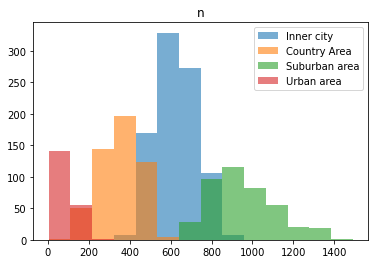

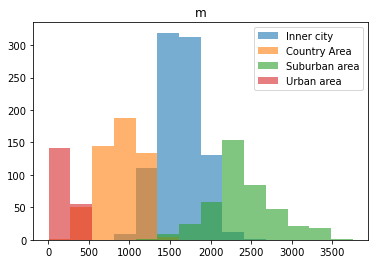

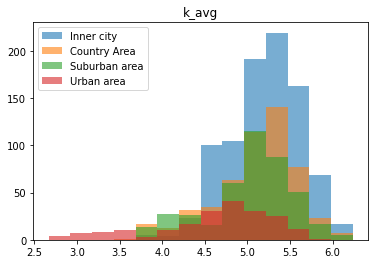

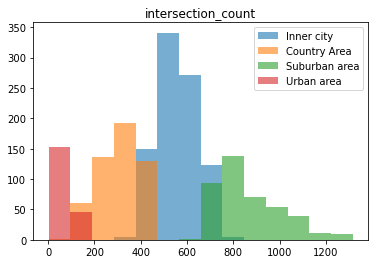

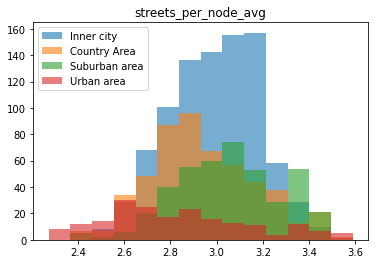

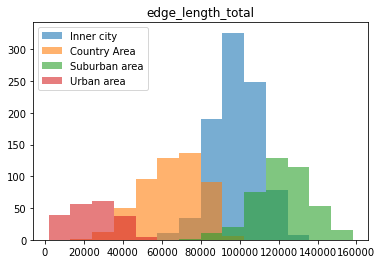

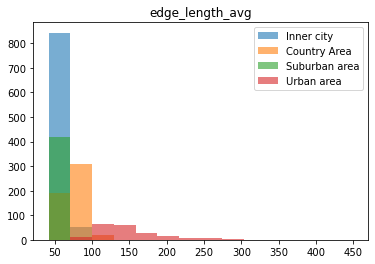

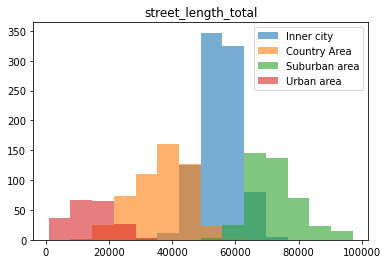

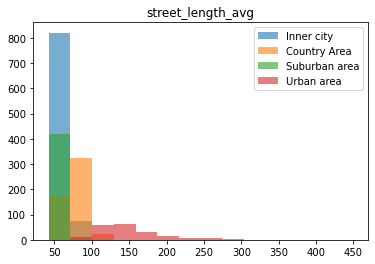

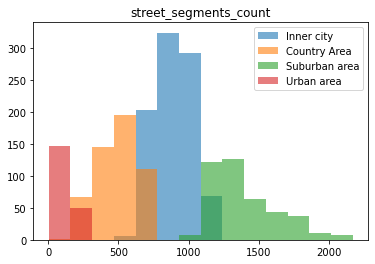

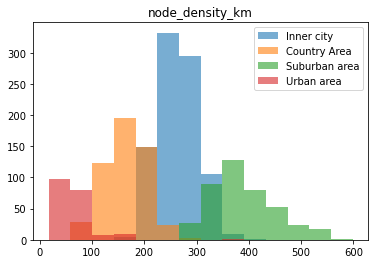

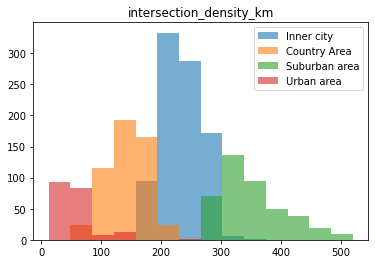

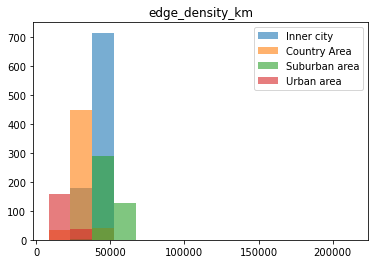

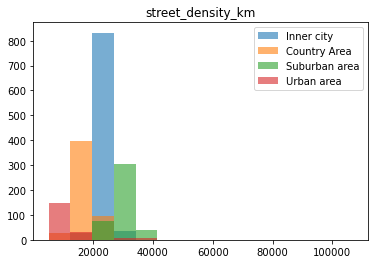

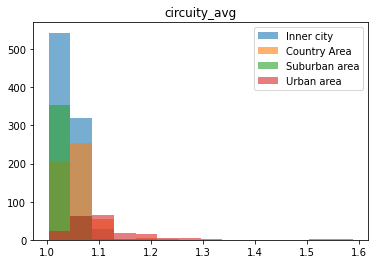

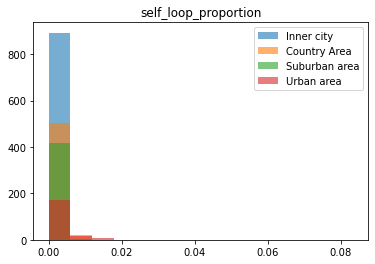

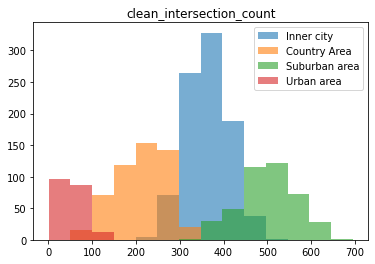

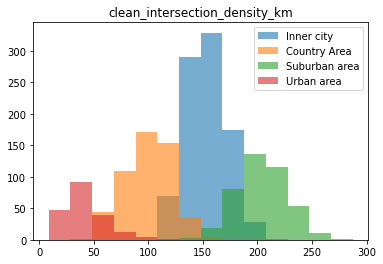

In [13]:
for feature in feature_columns:
    hist_feature(feature)

In [1]:
len(feature_columns)

NameError: name 'feature_columns' is not defined

In [2]:
import networkx as nx
import osmnx as ox
import requests
import sys,os,os.path
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'1.1.1'

In [16]:
geometry = tuple(stations_1.sample()[['lat', 'lon']].values.tolist()[0])
geometry

(35.560172, 140.363743)

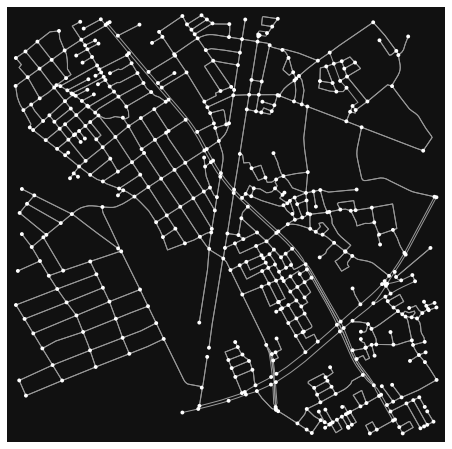

In [17]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_1.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

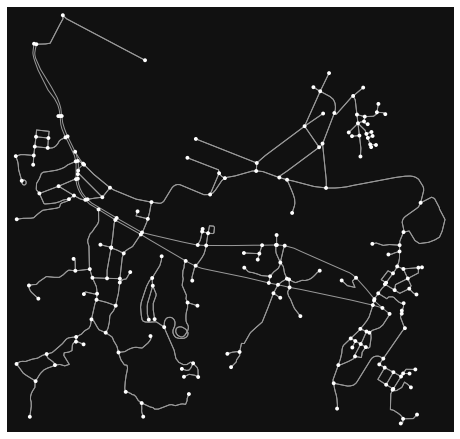

In [18]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_2.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

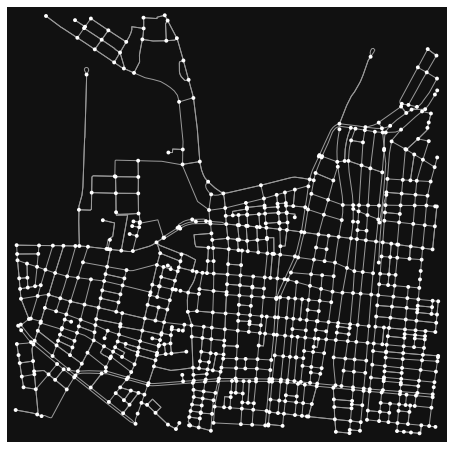

In [19]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_3.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

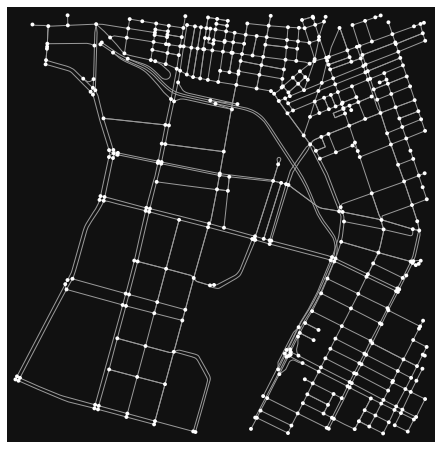

In [20]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_4.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

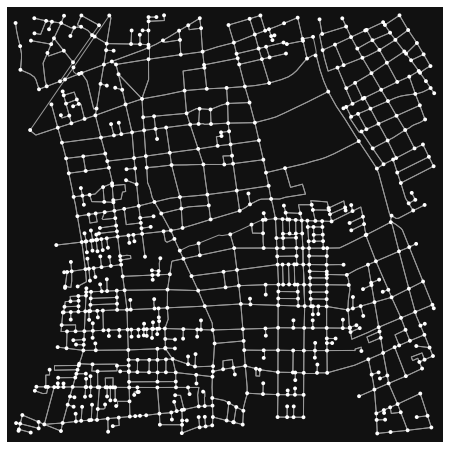

In [10]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_1.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

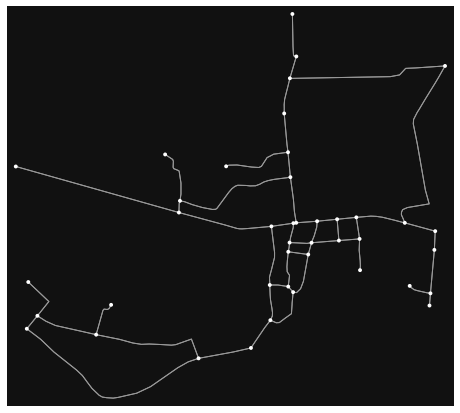

In [14]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_2.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

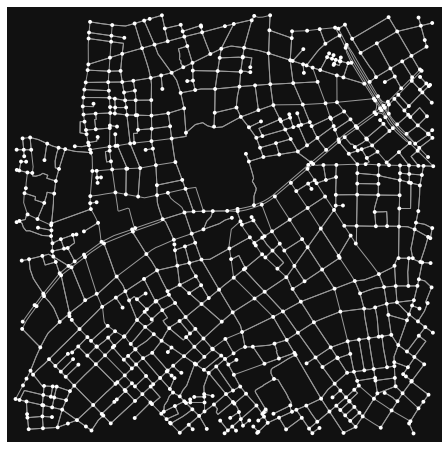

In [12]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_3.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

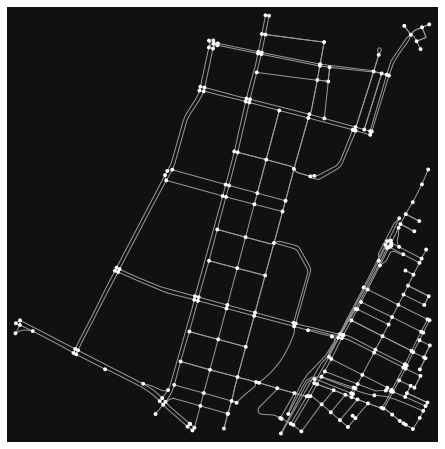

In [13]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_4.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

480    京成八幡
Name: station_name, dtype: object


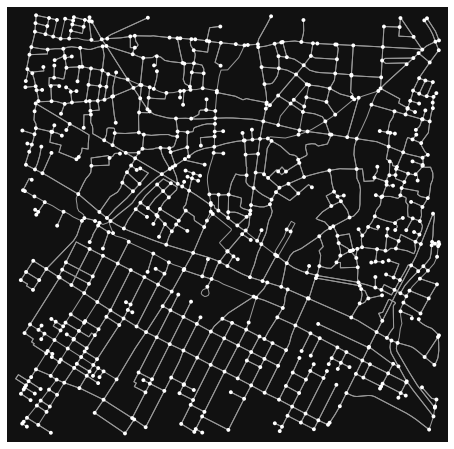

In [20]:
# inner_cityの800m範囲内を取得
station = stations_1.sample()
geometry = tuple(station[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)